In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy

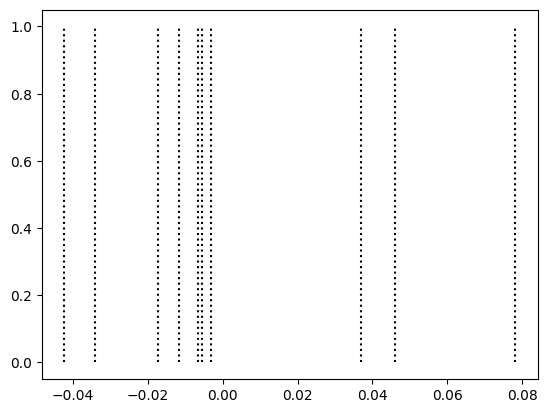

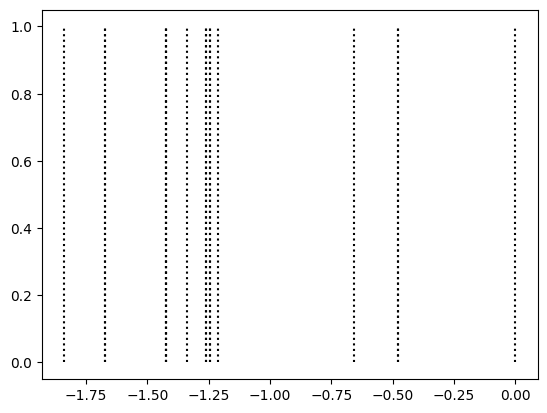

In [7]:

f = h5py.File("../../build/simul.h5", "r")
times = list(f["time_series/times"])
values_real = list(f["time_series/values_real"])
values_imag = list(f["time_series/values_imag"])
one_norm = f["hamiltonian"].attrs["one_norm"]
f.close()

values = np.array([complex(x, y) for (x, y) in zip(values_real, values_imag)])
values_fft = abs(np.fft.fft(values, len(values))[:])
sample_freq = np.fft.fftfreq(len(values_fft))

peaks = scipy.signal.find_peaks(values_fft)[0]
peak_freqs = [sample_freq[i] for i in peaks]
plt.vlines(peak_freqs, 0, 1, linestyles='dotted', colors="k")
plt.show()

eigs = [-1.8382052561377937, -1.6712704942150265, -1.6712704942150265,
        -1.422886756088479, -1.422886756088479, -1.422886756088479,
        -1.3370700060532204, -1.2616776969141434, -1.2616776969141434,
        -1.245391395908435, -1.245391395908435, -1.2101011705960758,
        -0.657553722272001, -0.47745562462465924, -0.4774556246246589,
        -3.469446951953614e-16]

plt.vlines(eigs, 0, 1, linestyles="dotted", colors="k")
plt.show()
